# Howdy, I'm Trey

And I live in Salt Lake City, UT, USA.

Trey | Salt Lake 
----- |---------
![Trey](images/trey.jpg) | ![Salt Lake City](images/slc.jpg)

I have a family, 3 kids, hobbies include running, cycling, astronomy, traditional woodworking, and pretending I live in France. 

### Background

* Building software for 20 years.
* Engineer, product manager, VP product.
* Trying to get back to engineer. 

### Contact

* Find me on twitter, @treybean

# Machine Learning is Math, not Magic

When I first started getting into machine learning, I was amazed at the results that could be achieved. I was excited to package up just about any problem and throw it at scikit-learn and see what I could get. Often, I could get pretty good results. The problem, was, though, all those models in scikit-learn were basically black boxes to me. I understood some basics, but I'll be honest, I figured the guts were too hard to understand exactly what was going on. Besides, I was having fun and solving problems.

Turns out, this attitude can only get you so far. If you really want to become a good machine learning engineer or data scientist, you need to be able to know exactly what's going on and how it works. At the very least, it will save you hours in feature engineering, model selection, and hyperparamter tuning.

One thing that clicked for me along my journey that helped me understand what a lot of these models were doing was gradient descent. Yes, I saw the cute videos on udacity about going down a cute-named mountain to find a optimum solution, but I knew there wasn't a real mountain inside those scikit-learn models, so it was still mostly black-box magic that I compartmentalized as "model does some magic to find the best solution and then gives it back to me to make magic predictions".

Well, it's not magic and when you understand what's going on, it's beautiful and can help you understand many underlying concepts in machine learning. 

Let's look at it in the context of linear regression.

## Linear Regression

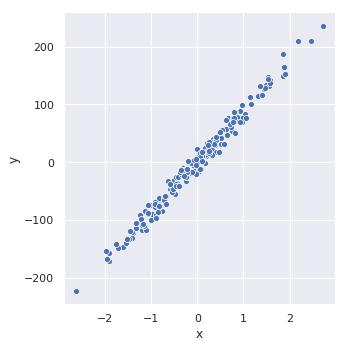

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.datasets import make_regression

# Generate some samples to play with
X, y, coef = make_regression(n_samples=200, n_features=1, n_informative=1, 
                             noise=10, coef=True, random_state=42)

data = pd.DataFrame(data=np.column_stack((X.flatten(), y)), columns=['x', 'y'])

# Plot
sns.relplot(x='x', y='y', data=data)

### Least squares coefficient estimates approach

Let $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$ be the prediction of $Y$ on the ith value of $X$.

To figure out the errors, or residuals, you would use the Residual Sum of Squares, $RSS$:

$RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x_1)^{2} + (y_2 - \hat{\beta_0} - \hat{\beta_1}x_2)^{2} + \dotsb + (y_n - \hat{\beta_0} - \hat{\beta_1}x_n)^{2}$

Based on the least square approach:

$\hat{\beta_1} = \frac{\displaystyle\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})} {\displaystyle\sum_{i=1}^{n} (x_i - \bar{x})^2}$

and

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$

In [86]:
x_bar = data.x.mean()
y_bar = data.y.mean()

data['x-mean_diff'] = data.x - x_bar
data['y-mean_diff'] = data.y - y_bar

beta1 = np.sum(data['x-mean_diff'] * data['y-mean_diff']) / (np.sum(np.square(data['x-mean_diff'])))
beta0 = y_bar - (beta1 * x_bar)

beta1, beta0, coef

(87.36641986560691, 1.4285139010211907, array(87.73730719))

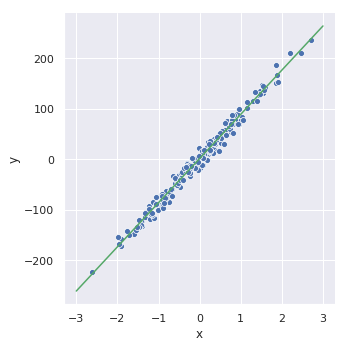

In [87]:
min_y = beta0 + beta1 * -3
max_y = beta0 + beta1 * 3

sns.relplot(x='x', y='y', data=data)
plt.plot([-3, 3], [min_y, max_y], 'g-')
plt.show()

Not bad for a little statistics—also not magic.

We can also do something similar using linear algebra and the normal equation.

### Normal Equation

In linear algebra, the matrix equation is: $A\vec{x} = \vec{b}$. Unfortunately, in our case of this equation isn't solvable because there's not vector, $\vec{x}$, that yields $\vec{b}$. Another way to think of this is simplay saying that there aren't any coefficients that could be applied to a linear equation to create a line that passes through all of our data points, X and y.

In linear algebra, when $A\vec{x} = \vec{b}$ has no solution, we multiply by $A^{T}$ and solve $A^{T}A\vec{x} = A^{T}\vec{b}$

To make things a little clearer with or current problems, $A$ is equal to our $X$ and $b$ is equal to our targets $y$. So we can rewrite the matrix equation as:

$X^{T}X\vec{w} = X^{T}\vec{y}$ and we want to solve for the weights, $\vec{w}$ or coefficients that minimize the error, in this case the sum of squares.

$\vec{w} = (X^{T}X)^{-1}X^{T}\vec{y}$

Let's use the linear algebra functions in numpy to solve it and see hwat we get.

[87.29901782]


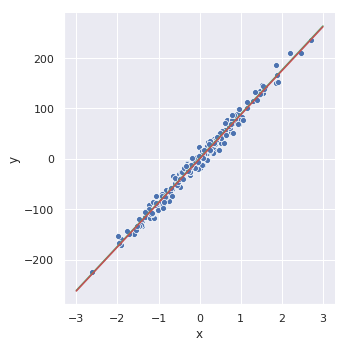

In [92]:
from numpy.linalg import inv

w = inv(X.T.dot(X)).dot(X.T).dot(y)

print(w)

X_bounds = np.array([[-3], [3]])
y_hats = X_bounds.dot(w)

sns.relplot(x='x', y='y', data=data)
plt.plot([-3, 3], [min_y, max_y], 'g-')
plt.plot(X_bounds, y_hats, 'r-')
plt.show()

Again, our coefficient is very close to the one returned by the make_regression function as well as super close to the one we calculated using the least squares coefficients estimate method. Pretty cool!

These direct ways to solve linear regression problems are great when our feature and sample space is small like this, but most real-world problems will require much larger features and sample spaces. When that's the case, these direct approaches become very computationally inefficient. Surely we need magic, then, right?

Wrong. That's where gradient descent comes into play.